In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
import librosa
import librosa.display

import warnings
warnings.filterwarnings('ignore')

In [2]:
wav_path = "harvard.wav"
data, fs = librosa.load(wav_path)
# fs is sampling frequency
# sampling frequency nothing but how may samples present for second.
print(f"Sampling frequency : {fs} and Wave : {data}")

Sampling frequency : 22050 and Wave : [ 5.5331129e-06 -1.1380684e-05 -7.8519388e-06 ... -2.0815509e-03
 -1.7469381e-03 -1.8701309e-03]


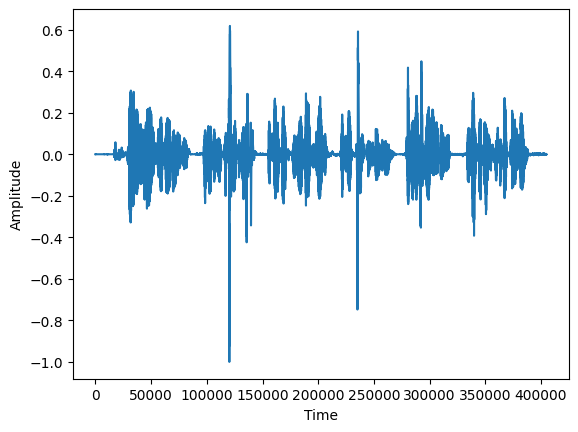

In [3]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [4]:
y, sr = librosa.load(wav_path)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Original mfcc matrix = 40 rows x 791 columns

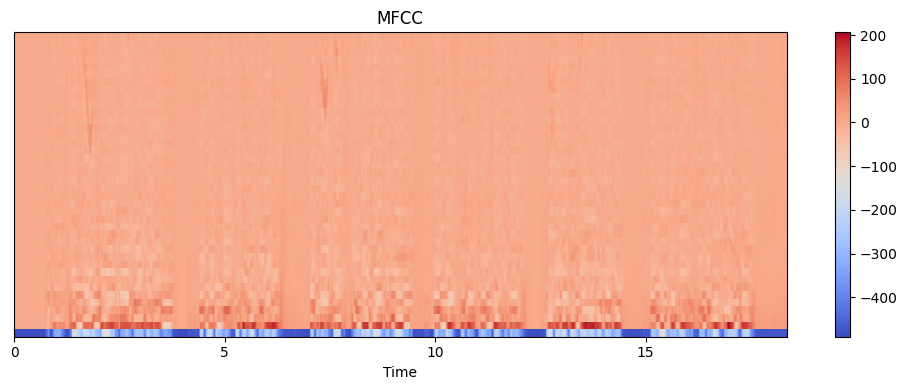

In [5]:
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [6]:
print(mfccs)

[[-4.8991229e+02 -4.8991229e+02 -4.8991229e+02 ... -4.7094757e+02
  -4.7416351e+02 -4.7496271e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.5248917e+01
   2.0959866e+01  2.0419622e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.1584646e+01
   1.7909817e+01  1.8486481e+01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.8584561e-02
  -2.1777425e+00  2.8941172e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.5755287e-02
  -2.3022323e+00 -3.6867142e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.0617002e-01
  -2.0723934e+00 -7.4630976e-01]]


In [7]:
print(len(mfccs))

40


In [8]:
print(mfccs[0])

[-489.9123  -489.9123  -489.9123  -489.9123  -489.9123  -489.9123
 -489.9123  -489.9123  -489.9123  -489.9123  -489.9123  -489.9123
 -489.9123  -489.9123  -489.9123  -489.9123  -489.9123  -489.9123
 -489.9123  -489.9123  -489.9123  -489.9123  -489.9123  -489.9123
 -489.9123  -489.9123  -489.9123  -489.9123  -489.9123  -489.9123
 -489.9123  -488.47754 -475.81808 -437.70193 -416.96008 -380.13425
 -417.5408  -478.88647 -478.03464 -448.12943 -386.62457 -351.25735
 -323.12418 -320.0896  -327.85718 -315.60825 -313.13705 -345.78925
 -379.7053  -402.87402 -421.3949  -442.33127 -468.18478 -476.30405
 -480.8188  -471.62518 -443.91214 -428.00226 -341.51193 -191.80371
 -132.44618 -105.73615 -103.95808 -134.31068 -183.79114 -200.1315
 -207.22408 -216.94052 -242.18657 -280.2988  -257.95956 -194.18643
 -173.90436 -177.63765 -186.72334 -192.3834  -205.48465 -234.09265
 -249.81773 -239.45049 -228.1905  -209.05843 -233.73521 -269.67456
 -278.95026 -283.67    -293.78677 -315.58374 -331.75015 -268.9303
 -

In [9]:
print(len(mfccs.T))
# Transpose mfcc matrix = 791 rows x 40 columns

791


In [10]:
mean_mfcc = np.mean(mfccs.T, axis=0)
print(mean_mfcc)

[-3.4356757e+02  6.6916656e+01  1.9060804e+01  2.2222908e+01
  7.2910886e+00  2.1337569e+00  4.8497394e-01  1.2759091e+00
 -6.6487226e+00  4.9738732e-01 -3.4090720e-02  1.2041575e+00
  1.1237950e+00  2.5453911e+00  8.0332327e-01  2.4566526e+00
 -2.9987618e-01  2.6862471e+00  2.0996480e+00  1.1240726e+00
 -1.9888135e+00  1.3488491e+00 -8.9928615e-01 -1.2961234e+00
 -9.8818853e-02 -4.2723027e-01 -6.8574160e-01  1.0115241e+00
 -5.9901077e-01  1.0509772e+00 -3.4889448e-01  1.1227231e+00
  1.0122595e+00  3.0394964e+00  2.7134061e-01  1.3685820e+00
 -9.3831748e-01  1.7771450e+00  1.2138371e+00  1.2075902e+00]


In [12]:
arr = np.array(mean_mfcc)
df = pd.Series(arr).to_frame().T

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-343.567566,66.916656,19.060804,22.222908,7.291089,2.133757,0.484974,1.275909,-6.648723,0.497387,...,-0.348894,1.122723,1.012259,3.039496,0.271341,1.368582,-0.938317,1.777145,1.213837,1.20759


Generating MFCC for Tamil Audio files

In [16]:
from glob import glob
audio_files = glob('Tamil/*.mp3')
mfcc_data = []
for audio_file in audio_files:
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mean_mfcc = np.mean(mfccs.T, axis=0)
    mfcc_data.append(mean_mfcc)
   

In [17]:
mfcc_df = pd.DataFrame(mfcc_data)

In [18]:
mfcc_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-226.264725,115.633728,1.390687,11.208610,0.508582,-13.740531,-12.114998,6.699061,-15.499586,2.241089,...,0.065259,3.008323,0.879912,7.057160,9.295283,7.365512,7.669946,8.917359,4.249747,1.140584
1,-197.741608,126.715782,-0.014250,-3.223183,-8.731679,-0.049863,-25.798056,0.385629,-19.783236,-14.083795,...,17.590418,8.947368,6.252818,2.797010,1.214067,2.593982,-1.351372,2.747783,-2.694342,0.746877
2,-308.452698,152.239517,-27.952610,6.615827,5.259683,-4.175349,-32.890617,-20.778269,-10.388649,-16.358906,...,2.676359,-3.777992,-0.404756,4.678023,-7.532666,3.323400,0.375516,-3.718719,1.431811,-0.211283
3,-197.093903,121.855141,-16.871046,12.140000,4.194642,-21.139391,-24.197515,1.200470,-25.337696,4.193198,...,14.023907,7.194867,1.217449,0.302840,-2.978409,0.756116,-1.950375,-1.079248,-1.885188,-1.486537
4,-280.538422,140.420181,28.431175,17.869673,13.859192,-5.877822,-7.331847,-9.376634,-26.014204,-15.115772,...,-4.523534,-2.557181,0.423252,0.276982,-2.189815,-0.874355,-5.049499,3.454460,-4.592467,0.088671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-177.953918,97.396423,-34.178566,27.634346,3.323032,-13.358194,-24.102425,-5.870241,-16.845861,-2.479406,...,12.555174,11.315482,8.787123,8.091170,4.090106,4.654803,0.843634,3.634418,0.494467,-2.446005
996,-193.593567,114.982086,-12.682908,10.151223,5.792325,-6.721737,-20.945173,-8.691294,-18.571827,-1.140603,...,3.386255,6.693469,7.891909,11.052626,2.661378,2.489006,1.502886,3.363131,3.183494,1.350060
997,-224.149658,128.805725,-16.500282,-3.622164,-6.437598,-11.792343,-14.860017,-6.745545,-16.486395,1.806386,...,-0.535038,-0.848518,1.363167,1.313466,-4.429969,-2.687618,-5.145350,-0.499491,-0.183826,-1.034272
998,-238.889191,120.916168,8.123582,-7.702649,-3.773504,-5.100080,-17.736614,0.782497,-23.675598,-8.656606,...,11.733758,9.282780,-0.917342,-0.201558,4.069830,4.129870,-2.818789,3.487874,-3.168528,-4.917773
